In [268]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [269]:
df = pd.read_excel('./data/us_youtube_trending.xlsx', sheet_name='Sheet1')
df.set_index('category_id',inplace = True)
df.head()

,video_id,trending_date,channel_title,publish_time,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled
category_id,,,,,,,,,,
22,2kyS6SvSYSE,2017-11-14,CaseyNeistat,2017-11-13T17:13:01.000Z,748374,57527,2966,15954,False,False
24,1ZAPwfrtAFY,2017-11-14,LastWeekTonight,2017-11-13T07:30:00.000Z,2418783,97185,6146,12703,False,False
23,5qpjK5DgCt4,2017-11-14,Rudy Mancuso,2017-11-12T19:05:24.000Z,3191434,146033,5339,8181,False,False
24,puqaWrEC7tY,2017-11-14,Good Mythical Morning,2017-11-13T11:00:04.000Z,343168,10172,666,2146,False,False
24,d380meD0W0M,2017-11-14,nigahiga,2017-11-12T18:01:41.000Z,2095731,132235,1989,17518,False,False


In [270]:
category = pd.read_excel('./data/us_youtube_trending.xlsx', sheet_name='Sheet2')
category.set_index('category_id',inplace = True)
category.head()

,category_name
category_id,
1,Film & Animation
2,Autos & Vehicles
10,Music
15,Pets & Animals
17,Sports


# Combine

In [271]:
data = df.join(category, on = "category_id",how = 'inner' )
data.head()

,video_id,trending_date,channel_title,publish_time,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,category_name
category_id,,,,,,,,,,,
22,2kyS6SvSYSE,2017-11-14,CaseyNeistat,2017-11-13T17:13:01.000Z,748374,57527,2966,15954,False,False,People & Blogs
22,0mlNzVSJrT0,2017-11-14,Nobrand,2017-04-21T06:47:32.000Z,98966,2486,184,532,False,False,People & Blogs
22,STI2fI7sKMo,2017-11-14,Shawn Johnson East,2017-11-11T15:00:03.000Z,321053,4451,1772,895,False,False,People & Blogs
22,KODzih-pYlU,2017-11-14,Grace Helbig,2017-11-11T18:08:04.000Z,197062,7250,217,456,False,False,People & Blogs
22,8mhTWqWlQzU,2017-11-14,Safiya Nygaard,2017-11-11T01:19:33.000Z,2744430,115426,1110,6541,False,False,People & Blogs


In [272]:
#Check 
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9881 entries, 22 to 43
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   video_id           9791 non-null   object
 1   trending_date      9881 non-null   object
 2   channel_title      9881 non-null   object
 3   publish_time       9881 non-null   object
 4   views              9881 non-null   int64 
 5   likes              9881 non-null   int64 
 6   dislikes           9881 non-null   int64 
 7   comment_count      9881 non-null   int64 
 8   comments_disabled  9881 non-null   bool  
 9   ratings_disabled   9881 non-null   bool  
 10  category_name      9881 non-null   object
dtypes: bool(2), int64(4), object(5)
memory usage: 791.3+ KB


In [287]:
data.reset_index(inplace=True)
data['trending_date'] = pd.to_datetime(data['trending_date'], format='%Y-%m-%d')
data['publish_time'] = pd.to_datetime(data['publish_time']).dt.date
data['publish_time'] = pd.to_datetime(data['publish_time'], format='%Y-%m-%d')

In [288]:
data.head()

,category_id,video_id,trending_date,channel_title,publish_time,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,category_name,time
0,22,2kyS6SvSYSE,2017-11-14,CaseyNeistat,2017-11-13,748374,57527,2966,15954,False,False,People & Blogs,1
1,22,0mlNzVSJrT0,2017-11-14,Nobrand,2017-04-21,98966,2486,184,532,False,False,People & Blogs,207
2,22,STI2fI7sKMo,2017-11-14,Shawn Johnson East,2017-11-11,321053,4451,1772,895,False,False,People & Blogs,3
3,22,KODzih-pYlU,2017-11-14,Grace Helbig,2017-11-11,197062,7250,217,456,False,False,People & Blogs,3
4,22,8mhTWqWlQzU,2017-11-14,Safiya Nygaard,2017-11-11,2744430,115426,1110,6541,False,False,People & Blogs,3


In [289]:
data['time'] = data['trending_date'] - data['publish_time']
data['time'] = data['time'].dt.days

In [291]:
titles = ['views','likes','dislikes','comment_count']

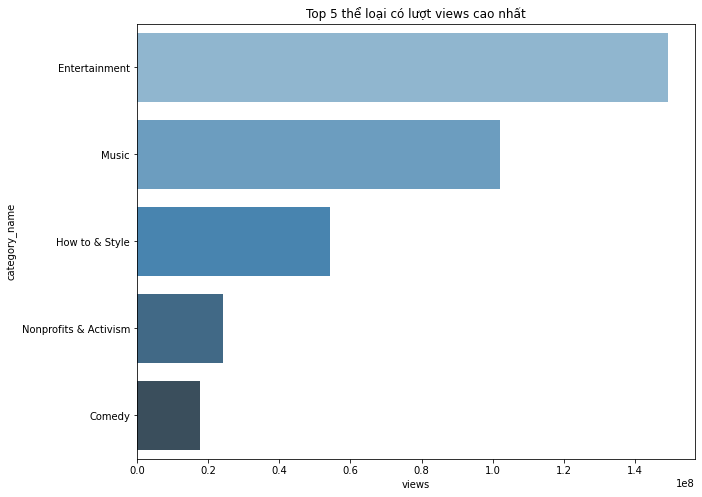

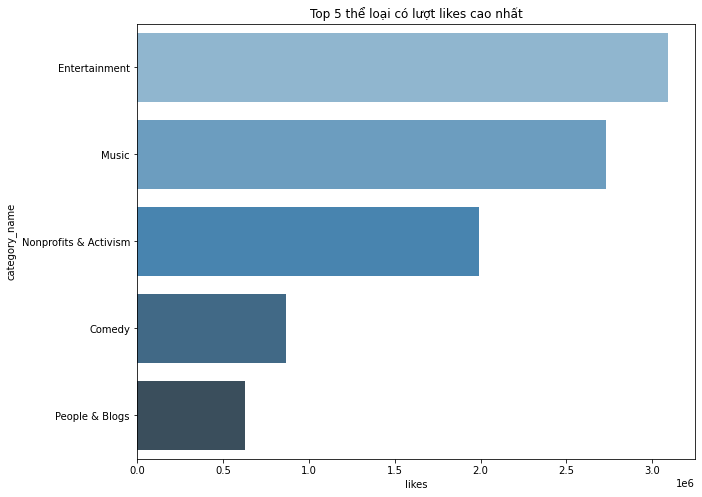

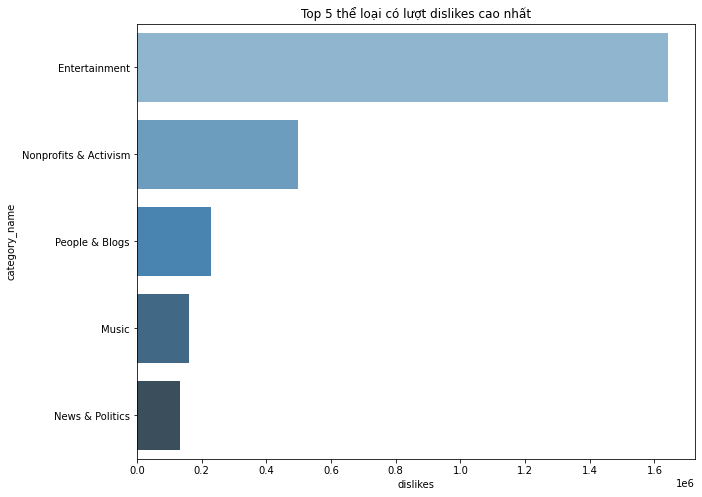

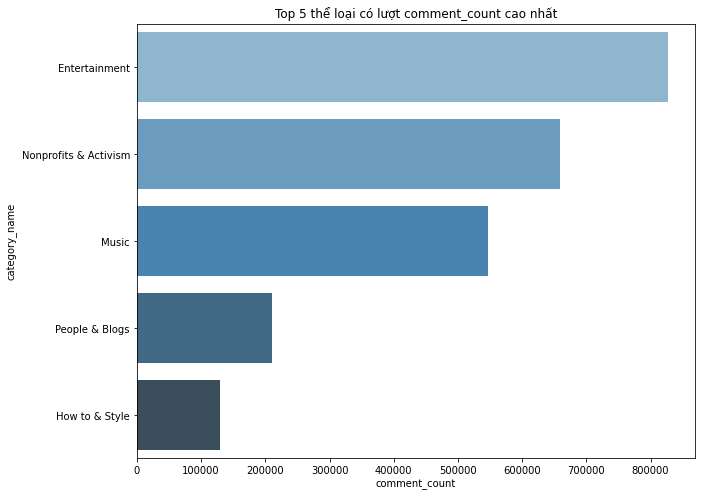

In [292]:
for title in titles:
    sorted_df = data.sort_values(by=title,ascending=False)
    sorted_df_top5 = sorted_df.drop_duplicates(subset=['category_name']).head(5)
    fig, ax = plt.subplots(figsize=(10,8))
    sns.barplot(y='category_name', x = title,data = sorted_df_top5,palette="Blues_d")
    plt.title('Top 5 thể loại có lượt'+' ' + title+' ' +'cao nhất')

In [304]:
sorted_df = data.sort_values(by='time',ascending=True)
print(f"Top 10 channel có video đạt top trending nhanh nhất")
sorted_df[['channel_title','time']].head(10)

Top 10 channel có video đạt top trending nhanh nhất


,channel_title,time
3497,Jimmy Kimmel Live,0
555,Sport Hub,0
495,Roy Moore for Senate,0
6531,Taylor Swift,0
2454,Watch What Happens Live with Andy Cohen,0
2455,FOX,0
1400,Pitch Perfect,0
3891,The Tonight Show Starring Jimmy Fallon,0
4559,Doug Ellison,0
2505,The Voice,0


Text(0.5, 1.0, 'Top 10 thể loại có lượt views thấp nhất')

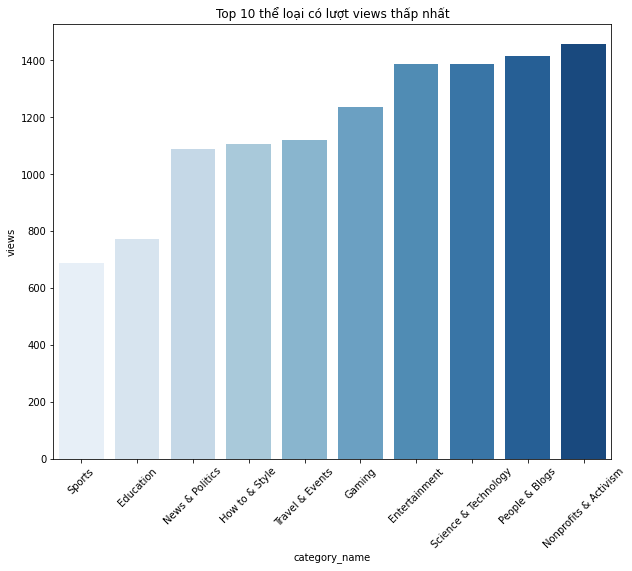

In [294]:
sorted_df = data.sort_values(by='views',ascending=True)
sorted_df_top5 = sorted_df.drop_duplicates(subset=['category_name']).head(10)
fig, ax = plt.subplots(figsize=(10,8))
sns.barplot(x='category_name', y = 'views',data = sorted_df_top5,palette="Blues")
plt.xticks(rotation=45)
plt.title('Top 10 thể loại có lượt views thấp nhất')

Text(0, 0.5, 'Channel')

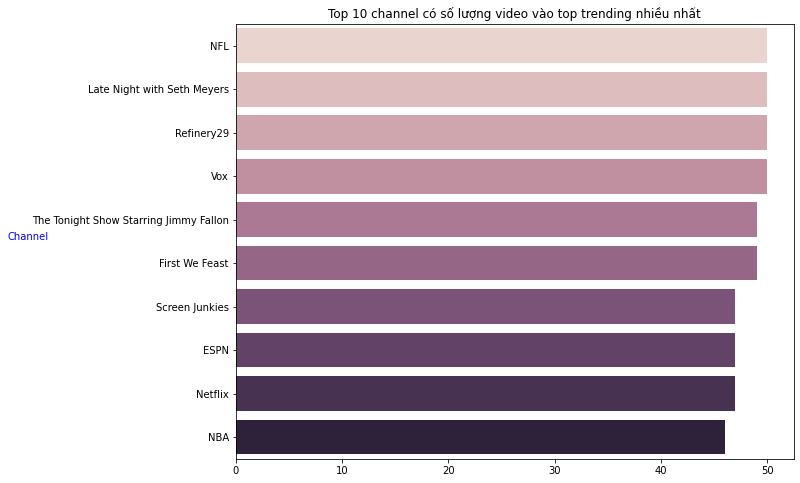

In [295]:
top10chanel = data.channel_title.value_counts().head(10)
fig, ax = plt.subplots(figsize=(10,8))

ax2 = sns.barplot(y=top10chanel.index, x = top10chanel.values,palette=sns.cubehelix_palette(n_colors=10), ax=ax)
plt.title('Top 10 channel có số lượng video vào top trending nhiều nhất')
ax2.set_ylabel("Channel", color = "Blue",rotation=0)

Text(0.5, 1.0, 'Top Số lượng video từng thể loại')

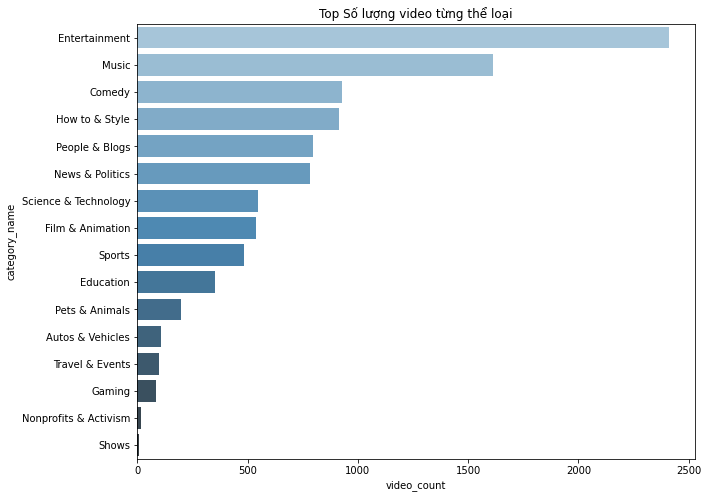

In [296]:
types = data.groupby("category_name").size().reset_index(name="video_count").sort_values("video_count", ascending=False)
fig, ax = plt.subplots(figsize=(10,8))
sns.barplot(x="video_count", y="category_name", data=types, ax=ax,palette="Blues_d")
plt.title('Top Số lượng video từng thể loại')

In [297]:
com = data[['views','likes','dislikes','comment_count']]

<AxesSubplot:>

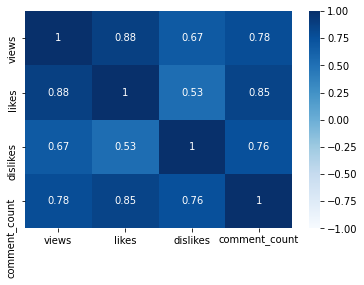

In [298]:
sns.heatmap(com.corr(), vmax= 1, vmin = -1, annot = True, cmap = "Blues")

'views','likes','dislikes','comment_count' có mối tương quan mạnh với nhau

Text(0.5, 1.0, 'Biểu đồ biến động của like và view ')

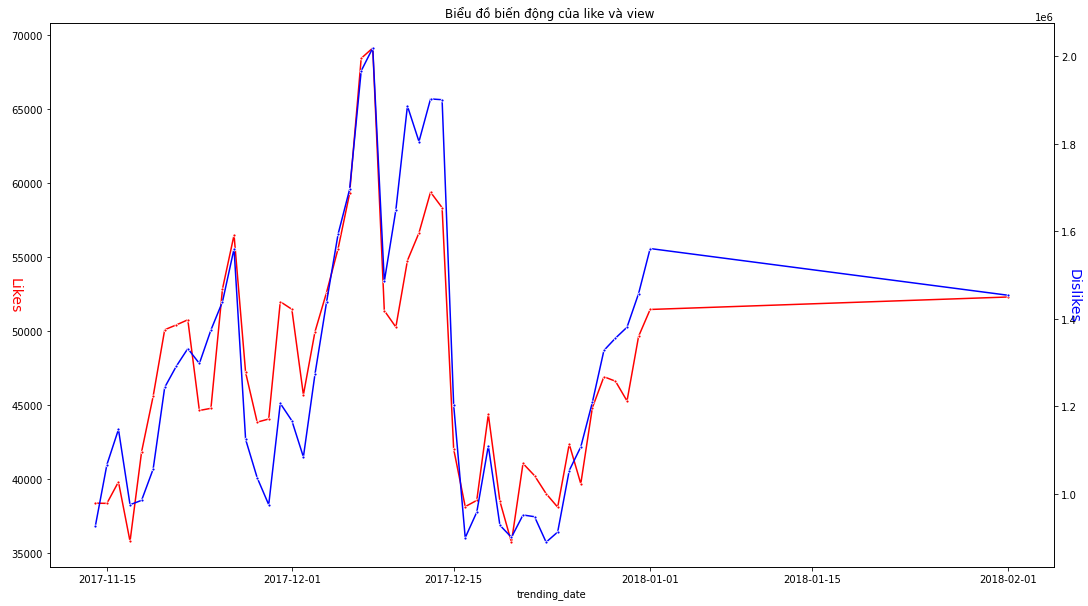

In [299]:
fig,ax = plt.subplots(figsize = (18, 10))
ax1 = sns.lineplot(x= 'trending_date',y =  'likes',ci=None,color="red",marker=".",data = data)
ax1.set_ylabel("Likes",color="red",fontsize=14,rotation=270)
ax2=ax.twinx()
ax2 = sns.lineplot(x = 'trending_date', y = 'views',ci=None,color="blue",marker="." , data = data)
ax2.set_ylabel("Dislikes",color="blue",fontsize=14,rotation=270)
plt.title("Biểu đồ biến động của like và view ")